___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().any()

False

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop('CustomerId', axis = 1)

In [12]:
df = df.drop('Surname', axis = 1)

In [16]:
df.shape

(10000, 12)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


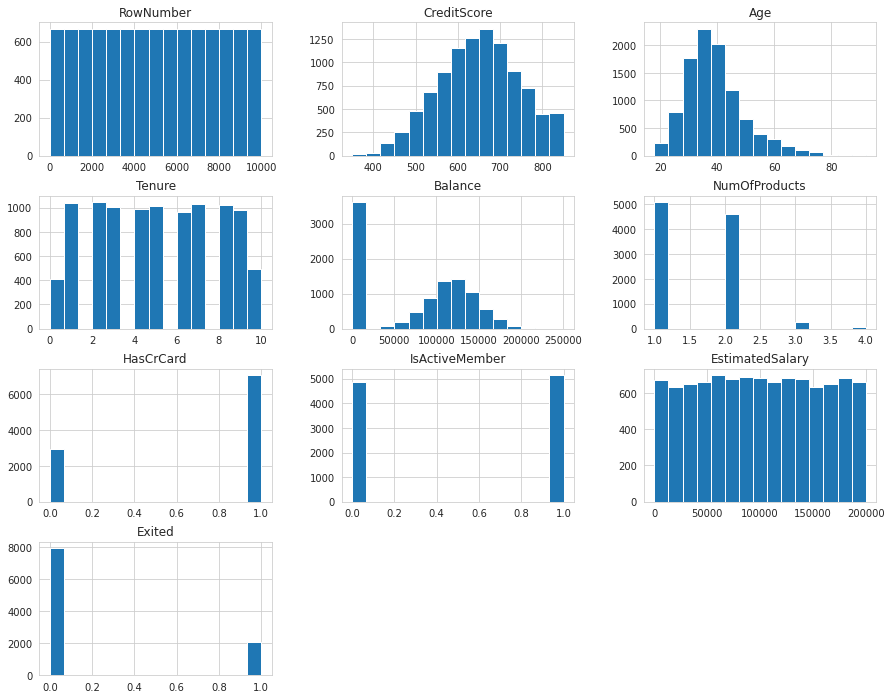

In [19]:
df.hist(figsize=(15,12), bins=15)
plt.show()

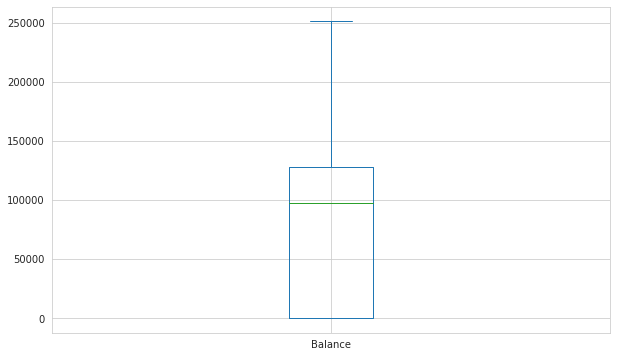

In [14]:
df.Balance.plot(kind="box")

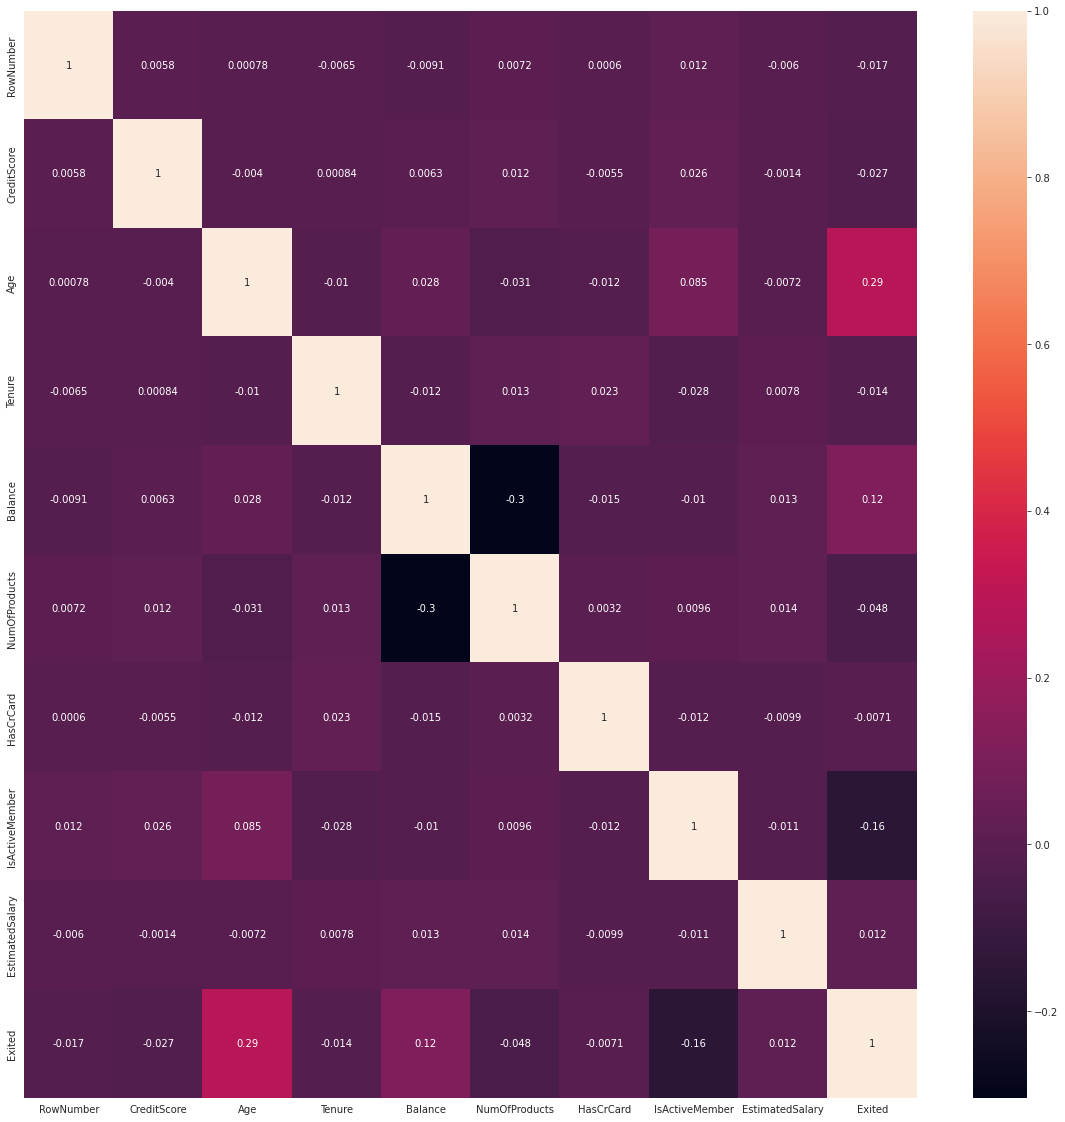

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

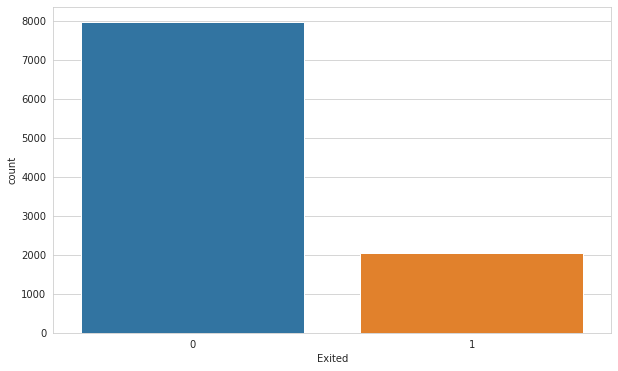

In [21]:
sns.countplot(df["Exited"])

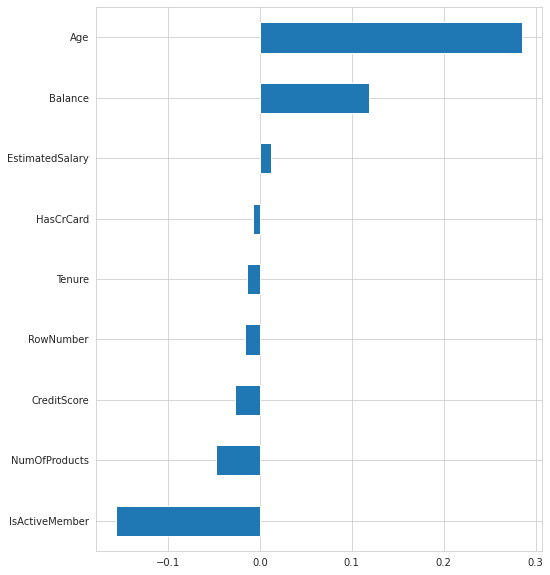

In [22]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

Convert categorical variables to dummy variables

In [23]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [27]:
seed = 42

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [32]:
X_train.shape

(9000, 12)

In [33]:
X_test.shape

(1000, 12)

## without class_weigth

In [40]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                312       
                                                                 
 dense_5 (Dense)             (None, 12)                300       
                                                                 
 dense_6 (Dense)             (None, 6)                 78        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(12, 24) dtype=float32, numpy=
 array([[ 0.13436443, -0.04816777, -0.12012094, -0.02899989, -0.3807647 ,
          0.15078437,  0.19605505,  0.30409968, -0.22345361, -0.22600882,
         -0.15481749,  0.18153644, -0.29950142,  0.039244  ,  0.06091782,
          0.3263402 , -0.40052125,  0.01733479,  0.10985512, -0.24549742,
          0.18732268,  0.03742376, -0.32042143,  0.1442799 ],
        [ 0.13086504, -0.13312942,  0.08280718, -0.23627308,  0.2880087 ,
         -0.04848215,  0.36622125, -0.21430919,  0.25457788,  0.02150604,
         -0.00464749, -0.23178014,  0.28227895,  0.3036421 , -0.156452  ,
          0.15252471, -0.21421574,  0.23002571,  0.38141692, -0.35215366,
          0.24391973,  0.13087392,  0.07115874, -0.27383912],
        [ 0.19440973, -0.14652812,  0.0876835 , -0.0283857 ,  0.39031434,
          0.18151903, -0.14413577,  0.26599282, -0.00188488, -0.24916478,
          0.21137035, -0.13223618, -0.17858362, -0.15094107,  0.08

### Create The Model

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose=1)

Epoch 1/1000
64/64 [==============================] - 1s 3ms/step - loss: 0.5762 - accuracy: 0.7932 - val_loss: 0.5032 - val_accuracy: 0.7989
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7960 - val_loss: 0.4799 - val_accuracy: 0.7989
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7960 - val_loss: 0.4619 - val_accuracy: 0.7989
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7960 - val_loss: 0.4507 - val_accuracy: 0.7989
Epoch 5/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7960 - val_loss: 0.4425 - val_accuracy: 0.7989
Epoch 6/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.7960 - val_loss: 0.4354 - val_accuracy: 0.7989
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7960 - val_loss: 0.4274 - val_accuracy: 0.7989
Epoch 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.576,0.793,0.503,0.799
1,0.497,0.796,0.480,0.799
2,0.479,0.796,0.462,0.799
3,0.468,0.796,0.451,0.799
4,0.461,0.796,0.442,0.799


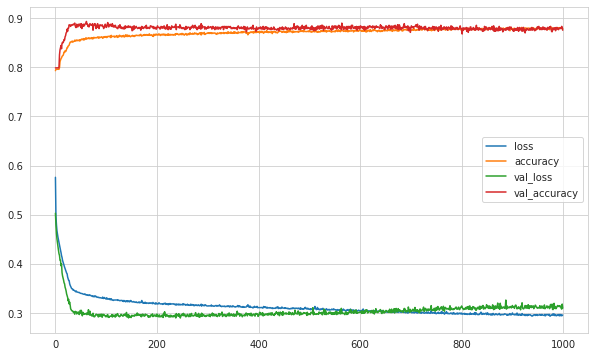

In [45]:
loss_df.plot();

In [46]:
model.evaluate(X_test, y_test, verbose=0)

[0.3512030839920044, 0.8579999804496765]

In [47]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3512030839920044
accuracy :  0.8579999804496765


In [48]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 712us/step
[[766  30]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.75      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [50]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [53]:
#y_pred_proba = model.predict(X_test)
#precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
#plt.plot(recalls, precisions, label='ANN')
#plt.xlabel('recalls')
#plt.ylabel('precisions')
#plt.title('Precision-Recall curve')
#plt.show()

### Create The Model

In [54]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8154 - val_loss: 0.4487 - val_accuracy: 0.7911
Epoch 2/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8193 - val_loss: 0.4543 - val_accuracy: 0.7844
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8212 - val_loss: 0.4014 - val_accuracy: 0.8244
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8233 - val_loss: 0.4020 - val_accuracy: 0.8256
Epoch 5/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8159 - val_loss: 0.3606 - val_accuracy: 0.8567
Epoch 6/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8254 - val_loss: 0.3663 - val_accuracy: 0.8511
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8242 - val_loss: 0.4184 - val_accuracy: 0.8078
Epoch 8/300
6

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.427,0.815,0.449,0.791
1,0.410,0.819,0.454,0.784
2,0.406,0.821,0.401,0.824
3,0.402,0.823,0.402,0.826
4,0.408,0.816,0.361,0.857


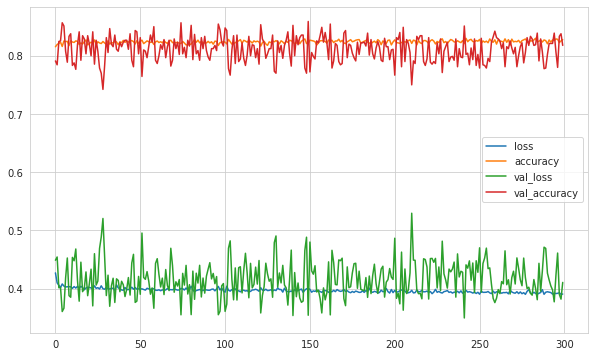

In [56]:
loss_df.plot();

In [57]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[639 157]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       796
           1       0.49      0.73      0.58       204

    accuracy                           0.79      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 4ms/step


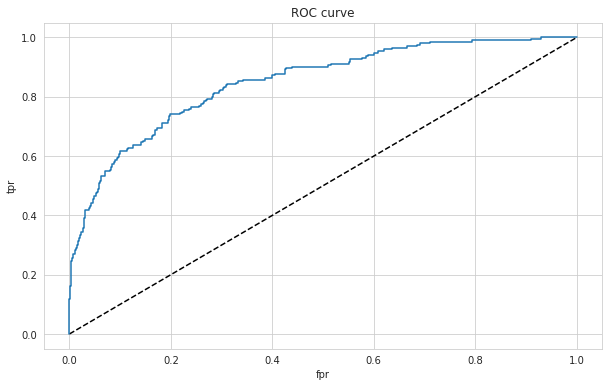

In [60]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [61]:
from tensorflow.keras.optimizers import Adam

In [62]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [63]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.7963 - val_loss: 0.4199 - val_accuracy: 0.8278
Epoch 2/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8191 - val_loss: 0.3453 - val_accuracy: 0.8644
Epoch 3/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8451 - val_loss: 0.3272 - val_accuracy: 0.8767
Epoch 4/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8501 - val_loss: 0.3158 - val_accuracy: 0.8789
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8484 - val_loss: 0.3141 - val_accuracy: 0.8711
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8510 - val_loss: 0.2998 - val_accuracy: 0.8833
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8509 - val_loss: 0.3032 - val_accuracy:

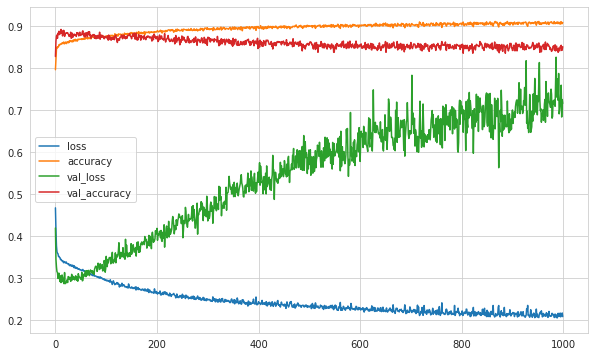

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [65]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.8915296196937561
accuracy :  0.8270000219345093


In [66]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 783us/step
[[728  68]
 [105  99]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       796
           1       0.59      0.49      0.53       204

    accuracy                           0.83      1000
   macro avg       0.73      0.70      0.71      1000
weighted avg       0.82      0.83      0.82      1000



### Add Dropout Layer

In [67]:
from tensorflow.keras.layers import Dropout

In [68]:
tf.keras.utils.set_random_seed(seed)

# tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [69]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5834 - accuracy: 0.7579 - val_loss: 0.4938 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7959 - val_loss: 0.4741 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7960 - val_loss: 0.4611 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7960 - val_loss: 0.4546 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7960 - val_loss: 0.4552 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7960 - val_loss: 0.4442 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7960 - val_loss: 0.4389 - val_accuracy:

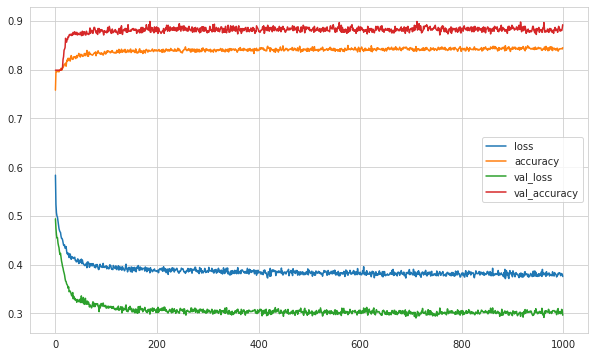

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [71]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35946881771087646
accuracy :  0.8640000224113464


In [72]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 805us/step
[[771  25]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.79      0.46      0.58       204

    accuracy                           0.86      1000
   macro avg       0.83      0.71      0.75      1000
weighted avg       0.86      0.86      0.85      1000



### Add Early Stop

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [77]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [78]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose = 1,
          callbacks = [early_stop], class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6593 - recall: 0.6538 - val_loss: 0.5914 - val_recall: 0.6575
Epoch 2/500
254/254 [==============================] - 0s 2ms/step - loss: 0.6107 - recall: 0.6665 - val_loss: 0.5484 - val_recall: 0.6685
Epoch 3/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5803 - recall: 0.7022 - val_loss: 0.5133 - val_recall: 0.6851
Epoch 4/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5566 - recall: 0.7282 - val_loss: 0.5400 - val_recall: 0.7680
Epoch 5/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5354 - recall: 0.7355 - val_loss: 0.4683 - val_recall: 0.7514
Epoch 6/500
254/254 [==============================] - 0s 1ms/step - loss: 0.5190 - recall: 0.7439 - val_loss: 0.4784 - val_recall: 0.8011
Epoch 7/500
254/254 [==============================] - 0s 2ms/step - loss: 0.5050 - recall: 0.7567 - val_loss: 0.4184 - val_recall: 0.7845
Epoch 8/500
254/254 [======

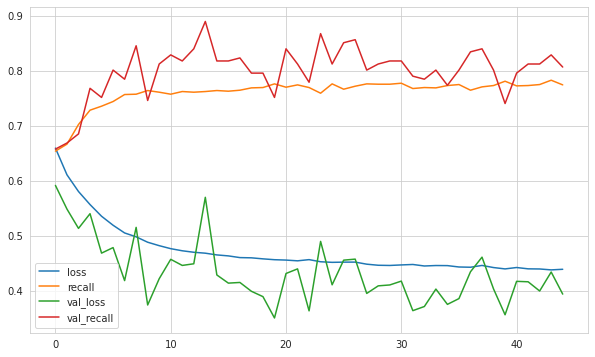

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [80]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3984663188457489
accuracy :  0.656862735748291


In [81]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 896us/step
[[672 124]
 [ 70 134]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       796
           1       0.52      0.66      0.58       204

    accuracy                           0.81      1000
   macro avg       0.71      0.75      0.73      1000
weighted avg       0.83      0.81      0.81      1000



#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

In [85]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [90]:
from keras.models import Sequential
from sklearn import datasets
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import pickle
import numpy as np
import json

In [91]:
def build_classifier(optimizer, learn_rate):
    tf.keras.utils.set_random_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [92]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [93]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

In [96]:
%%time
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


KeyboardInterrupt: ignored

In [97]:
grid_model.best_score_

AttributeError: ignored

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 840us/step


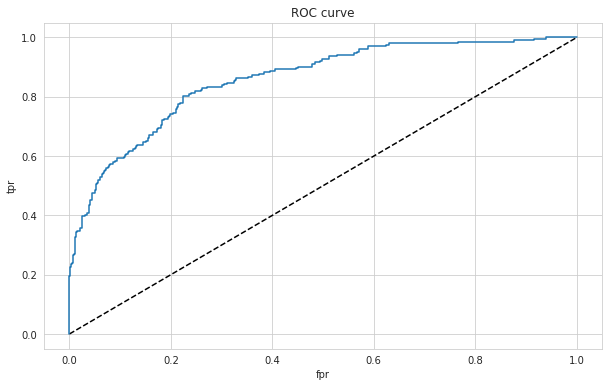

In [98]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [99]:
roc_auc_score(y_test, y_pred_proba)

0.8579601438565376

# Final Model and Model Deployment

In [108]:
import pickle
pickle.dump(scaler, open("scaler_Churn", 'wb'))

In [109]:
from tensorflow.keras.optimizers import Adam,Nadam

In [102]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Nadam(learning_rate=0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [110]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [111]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop], class_weight=class_weights)

Epoch 1/300
282/282 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7922 - val_loss: 0.4848 - val_accuracy: 0.7820
Epoch 2/300
282/282 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7916 - val_loss: 0.4923 - val_accuracy: 0.7660
Epoch 3/300
282/282 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8000 - val_loss: 0.4959 - val_accuracy: 0.7680
Epoch 4/300
282/282 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.7979 - val_loss: 0.5346 - val_accuracy: 0.7290
Epoch 5/300
282/282 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.7937 - val_loss: 0.4148 - val_accuracy: 0.8040
Epoch 6/300
282/282 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.7959 - val_loss: 0.4245 - val_accuracy: 0.8060
Epoch 7/300
282/282 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7979 - val_loss: 0.4575 - val_accuracy: 0.7930

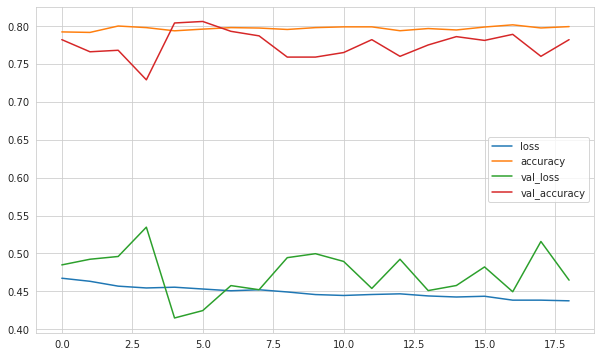

In [112]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [113]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5346215963363647
accuracy :  0.7289999723434448


In [114]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 814us/step
[[565 231]
 [ 40 164]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       796
           1       0.42      0.80      0.55       204

    accuracy                           0.73      1000
   macro avg       0.67      0.76      0.68      1000
weighted avg       0.83      0.73      0.75      1000



In [115]:
model.save('model_churn.h5')

In [116]:
from tensorflow.keras.models import load_model

In [119]:
model_churn = load_model('model_churn.h5')
scaler_Churn = pickle.load(open("scaler_Churn", "rb"))

## Prediction

In [120]:
single_customer = df.drop('Exited', axis = 1).iloc[0]
single_customer 

RowNumber                1.000
CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 0, dtype: float64

In [121]:
single_customer  = scaler_Churn.transform(single_customer )
single_customer 

ValueError: ignored

In [122]:
model_churn.predict(single_customer ) > 0.5).astype("int32")
#model_churn.predict_classes(single_customer )

SyntaxError: ignored

In [123]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___